Epoch 1/400
1810/1810 [==============================] - 36s 15ms/step - loss: 46.4159 - val_loss: 18.5539
Epoch 2/400
1810/1810 [==============================] - 24s 13ms/step - loss: 18.6663 - val_loss: 12.4315
Epoch 3/400
1810/1810 [==============================] - 24s 13ms/step - loss: 14.3972 - val_loss: 9.2752
Epoch 4/400
1810/1810 [==============================] - 24s 13ms/step - loss: 12.4334 - val_loss: 7.9732
Epoch 5/400
1810/1810 [==============================] - 24s 13ms/step - loss: 11.2013 - val_loss: 7.2527
Epoch 6/400
1810/1810 [==============================] - 24s 13ms/step - loss: 10.2226 - val_loss: 6.2146
Epoch 7/400
1810/1810 [==============================] - 22s 12ms/step - loss: 9.4560 - val_loss: 5.6402
Epoch 8/400
1810/1810 [==============================] - 24s 14ms/step - loss: 8.9462 - val_loss: 5.3217
Epoch 9/400
1810/1810 [==============================] - 25s 14ms/step - loss: 8.6861 - val_loss: 4.9787
Epoch 10/400
1810/1810 [=======================

1810/1810 [==============================] - 24s 13ms/step - loss: 4.2095 - val_loss: 1.4512
Epoch 79/400
1810/1810 [==============================] - 24s 13ms/step - loss: 4.1947 - val_loss: 1.5592
Epoch 80/400
1810/1810 [==============================] - 24s 13ms/step - loss: 4.1363 - val_loss: 1.4911
Epoch 81/400
1810/1810 [==============================] - 24s 13ms/step - loss: 4.1433 - val_loss: 1.5486
Epoch 82/400
1810/1810 [==============================] - 24s 13ms/step - loss: 4.0995 - val_loss: 1.3752
Epoch 83/400
1810/1810 [==============================] - 24s 13ms/step - loss: 4.1119 - val_loss: 1.4850
Epoch 84/400
1810/1810 [==============================] - 24s 13ms/step - loss: 4.1125 - val_loss: 1.6297
Epoch 85/400
1810/1810 [==============================] - 23s 13ms/step - loss: 4.1507 - val_loss: 1.4804
Epoch 86/400
1810/1810 [==============================] - 23s 13ms/step - loss: 4.0802 - val_loss: 1.5598
Epoch 87/400
1810/1810 [==============================] - 2

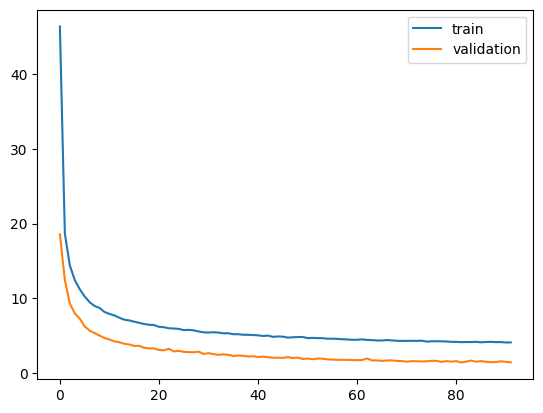

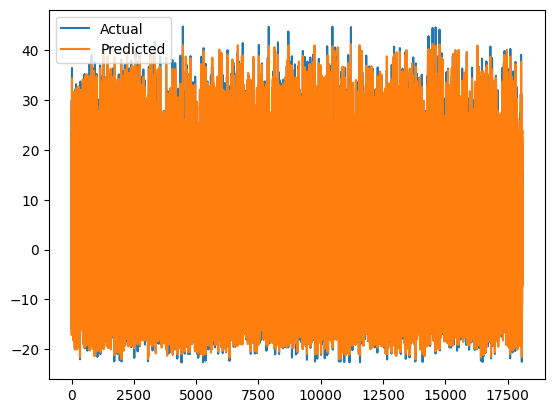

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('4_2_Autoencoder_features_Angle_Hip_X_csv.csv')

# Define features and target
features = ['St1_Torque_Knee_Z', 'St1_Angle_Pelvis_Z', 'St1_Torque_Knee_Y',
       'St1_Angle_Knee_X', 'St1_GRF_Y', 'St1_Torque_Ankle_X',
       'St1_Torque_Pelvis_Z', 'St1_Angle_Pelvis_Y', 'St1_Angle_Pelvis_X',
       'St1_Angle_Hip_Z']
            #, 'St1_Angle_Hip_Y', 'St1_Angle_Knee_Z',
       #'St1_Angle_Hip_X', 'St1_Angle_Ankle_Y', 'St1_Angle_Ankle_X',
       #'St1_GRF_Z', 'St1_Torque_Pelvis_X', 'St1_Torque_Hip_X',
       #'St1_Torque_Hip_Z', 'St1_Angle_Knee_Y']
            #, 'St1_GRF_X', 'St1_Torque_Hip_Y',
       #'St1_Torque_Pelvis_Y', 'St1_Angle_Ankle_Z', 'St1_Torque_Knee_X',
       #'Emg_raw_St1_BF', 'Emg_raw_St1_VL', 'St1_Torque_Ankle_Z',
       #'St1_Torque_Ankle_Y']
target = 'St1_Angle_Hip_X'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=400, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
# Reshape y_pred to 1D array for easier handling
y_pred = y_pred.flatten()

# Create a DataFrame with the input features and the predicted values
results = X_test.copy()
results['Predicted_Hip_Angle_X'] = y_pred
results['Actual_Hip_Angle_X'] = y_test.values

# Save to CSV
results.to_csv('Hip_Angle_X_predicted_raw_derived_autoencoder.csv', index=False)

# Visualize results
# Plot training & validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()
